In [8]:
from pycocotools.coco import COCO
import pandas as pd
import cv2, requests, io
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("genderCorr.csv")
df.head()

,image_id,female_indicator,male_indicator,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
0,139,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0
1,785,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,872,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,885,0,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000,0,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
instancesFile = '../annotations/instances_val2017.json'
annFile = '../annotations/captions_val2017.json'
cocoInstances = COCO(instancesFile)
cocoAnn = COCO(annFile)

loading annotations into memory...
Done (t=1.83s)
creating index...
index created!
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [200]:
# get image ids for male subset
object = '37'
subset = df[df[object] > 0]
subset = subset[subset['male_indicator'] == 1]
imgIds = subset['image_id'].tolist()
annIds = cocoAnn.getAnnIds(imgIds=imgIds)

In [184]:
# get image ids for female subset
object = '13'
subset = df[df[object] > 0]
subset = subset[subset['female_indicator'] == 1]
imgIds = subset['image_id'].tolist()
annIds = cocoAnn.getAnnIds(imgIds=imgIds)

In [201]:
imgIds

[19432,
 33759,
 39951,
 49759,
 55950,
 64718,
 79969,
 85772,
 88970,
 89296,
 109118,
 127530,
 135604,
 151629,
 152686,
 170474,
 171788,
 187055,
 192670,
 205105,
 225405,
 237071,
 238013,
 239537,
 248616,
 261732,
 302536,
 303713,
 311928,
 316404,
 320490,
 323496,
 343218,
 343524,
 357816,
 362716,
 370375,
 371552,
 388215,
 398742,
 406129,
 407298,
 409211,
 410510,
 412286,
 414673,
 427160,
 429690,
 431693,
 451435,
 463690,
 493905,
 504415,
 515579,
 515982,
 554328,
 562581,
 566282,
 567640]

Image Id: 515982


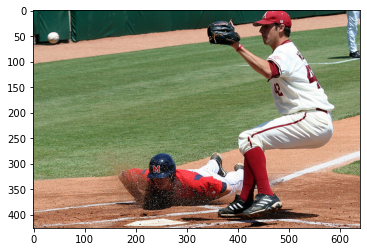

In [242]:
i = 54
img = cocoInstances.loadImgs(imgIds)[i]
img_data = io.BytesIO(requests.get(img['coco_url']).content)
img = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), 1)
plt.imshow(img[...,::-1])
print('Image Id: {0}'.format(imgIds[i]))

In [243]:
filename = 'images/m_m_{0}_{1}.jpg'.format('sports', imgIds[i])
cv2.imwrite(filename, img)
print(filename)

images/m_m_sports_515982.jpg


### Get Annotations

In [16]:
my_file = open("../imageId.txt", "r")
id_list = my_file.readlines()
id_list = [int(x.strip('\n')) for x in id_list]

In [10]:
annIds = cocoAnn.getAnnIds(imgIds = [55950])
anns = cocoAnn.loadAnns(annIds)

In [23]:
import csv
with open('../annotations/gtAnnotations.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['image_id', 'id', 'coco_caption'])
    for ann in anns:
        writer.writerow([ann['image_id'], ann['id'], ann['caption']])
    

In [11]:
anns

[{'image_id': 55950,
  'id': 798998,
  'caption': 'a man is playing tennis and is going to return the ball'},
 {'image_id': 55950,
  'id': 799178,
  'caption': 'a man playing tennis on a tennis court'},
 {'image_id': 55950,
  'id': 799544,
  'caption': 'A man at the net makes a forehand volley in a tennis match.'},
 {'image_id': 55950,
  'id': 799874,
  'caption': 'A young man playing tennis and preparing to hit the ball.'},
 {'image_id': 55950,
  'id': 799880,
  'caption': 'a man is on a court with a tennis racket'}]